In [1]:
import cv2

In [25]:
from shutil import copyfile
import cv2
from Asbestos_Utils import name_list, load_image_label,get_file_extension
from os.path import exists, join

from os import makedirs

def preprocess_CLAHE(read_path, save_path):
    """
    Takes the images in the read path together with the ground truth labels. Produces and saves
    new images with thicker ground truth label saved in the save path.
    :param read_path: The path were the original ground truths are
    :param save_path: The path were the new thicker ground truths will be saved
    :param thickness: The thickness for the new ground truth images
    :param load_type: The type of the original images saved
    :param write_images: This flag determines if the original images will be also copied into the path (the input data)
    :return: None
    """

    # Get the image names in the read path
    names = name_list(read_path,extension='.png')
    if not (exists(save_path)):
        makedirs(save_path)  # Creates the folder if the save path doesn't exist

    # For each of the images produce a new image with the thicker ground truth
    for name in names:
        print('Converting image %s...\n' % name)
        image = cv2.imread(join(read_path,name))
        label = cv2.imread(join(read_path,name.replace(get_file_extension(name), '_FIB' + get_file_extension(name))))
        print(image,label)
#         image, label = load_image_label(read_path, name)
        image_lab = cv2.cvtColor(image,cv2.COLOR_BGR2LAB)
        lab_planes = cv2.split(image_lab)
        clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
        lab_planes[0] = clahe.apply(lab_planes[0])
        lab = cv2.merge(lab_planes)
        bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
        cv2.imwrite(join(save_path, name.replace(get_file_extension(name), '_FIB' + get_file_extension(name))), label)
        cv2.imwrite(join(save_path, name), bgr)
        
        


In [26]:
read_path='./Both'
save_path='New Preprocessed'

In [27]:
save_thick_fibers(read_path, save_path)

Converting image 32-BXLN2_20170128_190907_b_strip0_LargeROI.png...

[[[ 89  98 111]
  [ 87  98 111]
  [ 81  93 105]
  ..., 
  [ 97 103 114]
  [ 93  99 110]
  [ 91 100 110]]

 [[ 84  97 108]
  [ 86  97 110]
  [ 82  93 107]
  ..., 
  [ 92 101 111]
  [ 90 100 110]
  [ 89  97 111]]

 [[ 89 101 113]
  [ 85  97 109]
  [ 86  96 111]
  ..., 
  [ 88  97 109]
  [ 88  98 109]
  [ 85  96 109]]

 ..., 
 [[ 88  96 103]
  [ 94 100 105]
  [ 94 100 105]
  ..., 
  [ 81 104 119]
  [ 82 105 117]
  [ 82 104 116]]

 [[ 93 104 111]
  [ 93 103 108]
  [ 93 103 107]
  ..., 
  [ 83 107 119]
  [ 83 105 117]
  [ 82 104 116]]

 [[ 96 108 116]
  [ 93 106 113]
  [ 88 101 108]
  ..., 
  [ 85 107 119]
  [ 84 105 117]
  [ 88 109 121]]] [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [25

Converting image A_32-BXLN2_20161226_161820_d_Uitbrokkeling_strip1_LargeROI.png...

[[[ 64  66  67]
  [ 64  66  66]
  [ 63  65  66]
  ..., 
  [ 65  64  67]
  [ 66  65  67]
  [ 60  61  66]]

 [[ 62  64  65]
  [ 61  63  64]
  [ 61  63  64]
  ..., 
  [ 66  66  70]
  [ 65  65  69]
  [ 62  63  67]]

 [[ 62  64  65]
  [ 64  66  67]
  [ 66  68  69]
  ..., 
  [ 63  64  68]
  [ 60  61  65]
  [ 64  65  70]]

 ..., 
 [[103 112 121]
  [ 99 110 118]
  [ 98 109 117]
  ..., 
  [ 94 100 105]
  [ 95 101 106]
  [100 107 110]]

 [[101 110 119]
  [100 110 119]
  [ 94 105 113]
  ..., 
  [ 96 102 107]
  [ 97 103 108]
  [101 108 111]]

 [[ 99 108 117]
  [ 99 110 118]
  [ 93 105 113]
  ..., 
  [ 97 105 112]
  [ 97 105 112]
  [104 110 115]]] [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [25

Converting image A_32-BXLN2_20170131_130633_b_Uitbrokkeling_strip0_LargeROI.png...

[[[ 93 100 103]
  [ 96 103 107]
  [ 92  99 102]
  ..., 
  [ 97 101 103]
  [ 97 100 102]
  [ 96 100 101]]

 [[ 91  98 101]
  [ 94 101 104]
  [ 96 103 106]
  ..., 
  [ 97 102 102]
  [ 98 102 103]
  [ 95  99 100]]

 [[ 92  99 102]
  [ 88  95  98]
  [ 89  96  99]
  ..., 
  [ 92  96  97]
  [ 95  99 100]
  [ 93  97  98]]

 ..., 
 [[218 222 223]
  [219 224 224]
  [214 219 222]
  ..., 
  [215 215 215]
  [217 217 217]
  [221 221 221]]

 [[223 227 227]
  [222 225 226]
  [218 223 223]
  ..., 
  [216 216 216]
  [218 218 218]
  [222 222 221]]

 [[224 226 226]
  [224 226 226]
  [223 226 225]
  ..., 
  [217 217 217]
  [217 218 216]
  [219 220 218]]] [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [25

Converting image A_32-BXLN2_20170220_070253_b_Uitbrokkeling_strip0_LargeROI.png...

[[[ 58  57  60]
  [ 54  55  59]
  [ 51  52  56]
  ..., 
  [ 46  46  46]
  [ 47  46  47]
  [ 47  46  48]]

 [[ 52  52  53]
  [ 51  53  54]
  [ 51  53  54]
  ..., 
  [ 45  45  45]
  [ 45  46  45]
  [ 45  45  45]]

 [[ 52  51  53]
  [ 50  52  53]
  [ 50  52  53]
  ..., 
  [ 49  49  49]
  [ 47  47  47]
  [ 45  45  45]]

 ..., 
 [[ 84  91 102]
  [ 83  91 101]
  [ 82  90  99]
  ..., 
  [107 116 124]
  [104 112 120]
  [ 98 105 113]]

 [[ 81  90 102]
  [ 81  89 101]
  [ 79  89  98]
  ..., 
  [106 114 123]
  [103 111 120]
  [ 95 104 113]]

 [[ 81  91 104]
  [ 75  84  97]
  [ 75  84  97]
  ..., 
  [ 97 107 117]
  [ 96 106 116]
  [ 95 105 115]]] [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [25

  [255 255 255]]]
Converting image V_32-BXLN2_20161220_201654_037A_Uitbrokkeling_strip0_LargeROI.png...

[[[ 80  85  84]
  [ 79  84  83]
  [ 76  80  81]
  ..., 
  [ 82  86  87]
  [ 80  84  85]
  [ 80  84  85]]

 [[ 79  84  84]
  [ 80  85  84]
  [ 78  83  83]
  ..., 
  [ 78  82  83]
  [ 74  77  78]
  [ 81  84  85]]

 [[ 83  87  87]
  [ 81  84  86]
  [ 79  84  85]
  ..., 
  [ 79  83  84]
  [ 79  82  82]
  [ 85  87  88]]

 ..., 
 [[109 121 130]
  [106 121 128]
  [105 120 128]
  ..., 
  [ 94 100 107]
  [ 98 102 107]
  [104 108 112]]

 [[109 123 132]
  [106 123 129]
  [105 122 129]
  ..., 
  [ 98 104 112]
  [102 106 111]
  [103 107 112]]

 [[107 122 131]
  [107 123 130]
  [108 124 131]
  ..., 
  [101 107 114]
  [103 107 111]
  [101 106 110]]] [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 2

Converting image V_32-BXLN2_20170104_075859_b_Uitbrokkeling_strip0_LargeROI.png...

[[[37 37 37]
  [38 38 38]
  [38 38 38]
  ..., 
  [45 45 45]
  [48 48 48]
  [47 46 48]]

 [[37 40 38]
  [35 37 37]
  [35 37 37]
  ..., 
  [43 42 44]
  [43 42 44]
  [43 42 44]]

 [[40 41 42]
  [36 38 38]
  [35 37 37]
  ..., 
  [44 43 45]
  [42 41 43]
  [43 42 44]]

 ..., 
 [[59 71 81]
  [62 74 84]
  [61 73 84]
  ..., 
  [65 83 92]
  [66 83 92]
  [66 81 90]]

 [[57 70 78]
  [63 76 84]
  [62 75 83]
  ..., 
  [69 87 95]
  [68 85 94]
  [66 82 91]]

 [[60 73 80]
  [60 73 81]
  [57 70 78]
  ..., 
  [71 88 96]
  [66 83 92]
  [71 86 95]]] [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ..., 
 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 


In [1]:
from AsbestosModels import AsbestosModels

Using TensorFlow backend.


In [2]:
AM = AsbestosModels('./Final_Report')

Model number 0 : First_Stage BEST   : parameters {'BV': 1, 'HEE': 0, 'E': 70, 'D': 308, 'L': 3, 'HEPI': 0, 'BT': 10}
Model number 1 : First_Stage BEST   : parameters {'BV': 1, 'HEE': 0, 'E': 70, 'D': 308, 'L': 3, 'HEPI': 0, 'BT': 10}
Model number 2 : First_Stage BEST   : parameters {'BV': 1, 'HEE': 0, 'E': 70, 'D': 308, 'L': 3, 'HEPI': 0, 'BT': 10}
Model number 3 : First_Stage BEST   : parameters {'BV': 1, 'HEE': 0, 'E': 70, 'D': 308, 'L': 3, 'HEPI': 0, 'BT': 10}
Model number 4 : Hard_Examples_Preproc BEST   : parameters {'BV': 1, 'HEE': 2, 'E': 50, 'D': 308, 'L': 3, 'HEPI': 2, 'BT': 10}
Model number 5 : Hard_Examples_PreprocHE0 BEST   : parameters {'BV': 1, 'HEE': 2, 'E': 50, 'D': 376, 'L': 3, 'HEPI': 2, 'BT': 10}
Model number 6 : Hard_Examples_PreprocHE1 BEST   : parameters {'BV': 1, 'HEE': 2, 'E': 50, 'D': 444, 'L': 3, 'HEPI': 2, 'BT': 10}
Model number 7 : Preproc BEST   : parameters {'BV': 1, 'HEE': 0, 'E': 70, 'D': 308, 'L': 3, 'HEPI': 0, 'BT': 10}
Model number 8 : Preproc BEST   

In [5]:
model,model_name = AM.extract_model(0,3)

[<tf.Tensor 'input_3:0' shape=(?, ?, ?, 3) dtype=float32>, <tf.Tensor 'conv2d_24/Relu:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'max_pooling2d_5/MaxPool:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'conv2d_26/Relu:0' shape=(?, ?, ?, 64) dtype=float32>, <tf.Tensor 'max_pooling2d_6/MaxPool:0' shape=(?, ?, ?, 64) dtype=float32>, <tf.Tensor 'conv2d_28/Relu:0' shape=(?, ?, ?, 128) dtype=float32>, <tf.Tensor 'concatenate_5/concat:0' shape=(?, ?, ?, 192) dtype=float32>, <tf.Tensor 'conv2d_30/Relu:0' shape=(?, ?, ?, 64) dtype=float32>, <tf.Tensor 'concatenate_6/concat:0' shape=(?, ?, ?, 96) dtype=float32>, <tf.Tensor 'conv2d_32/Relu:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'conv2d_33/Sigmoid:0' shape=(?, ?, ?, 1) dtype=float32>]


In [6]:
from AsbestosPostProcess import AsbestosModelProcess

In [7]:
path_data = './Padded'
path_data_files = './Final_Report'
threshold = 0.2
percentage = 0.2
AsbestosModelProcess(path_data, path_data_files, model, model_name, threshold, percentage, data='Validation')

error: D:\Build\OpenCV\opencv-3.3.0\modules\imgproc\src\contours.cpp:199: error: (-210) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function cvStartFindContours_Impl


In [8]:
from DataPantograph import DataPantograph

In [11]:
path_data = "./Padded"
DP_parameters = {'path_name':path_data,
                 'data_name':'Final_Report',
                 'size':(128,128),
                 'augmentation':False,
                 'train_percentage':0.63,
                 'val_percentage':0.07,
                 'test_percentage':0.3,
                 'load_extension':'.png'}
DP = DataPantograph(**DP_parameters)

The data set already exists. Loading the specified data ...

Size of training set: 34

Size of validation set: 3

Size of test set: 15



In [22]:
import cv2
from os.path import join
import matplotlib.pyplot as plt
def pad_image(num_layers,image):
    sizex = image.shape[1]
    sizey = image.shape[0]
    max_pooling_layers = num_layers-1
    mod = 2**max_pooling_layers
    print('Mod',mod)
    print('Size',image.shape)
    if (sizex % mod) == 0:
        extrapixX =0
    else:
        extrapixX = mod - (sizex % mod)
    if (sizey % mod) == 0:
        extrapixY = 0
    else:
        extrapixY = mod - (sizey % mod)
    print('Extrapix',(extrapixX,extrapixY))
    left = extrapixX//2
    right = extrapixX-left
    top = extrapixY//2
    bottom = extrapixY-top
    image = cv2.copyMakeBorder(image, top, bottom, left, right, 0,value = [255,255,255])
    print('Image size ',image.shape)
    return image

In [12]:
DP.test_names

['32-BXLN2_20170210_060127_d_strip0_LargeROI.png',
 'A_32-BXLN2_20161223_152332_b_strip0_LargeROI.png',
 'A_32-BXLN2_20170104_175818_c_Uitbrokkeling_strip0_LargeROI.png',
 'A_32-BXLN2_20170131_061927_b_Uitbrokkeling_strip0_LargeROI.png',
 'A_32-BXLN2_20170131_061927_b_Uitbrokkeling_strip1_LargeROI.png',
 'A_32-BXLN2_20170208_125814_b_Uitbrokkeling_strip1_LargeROI.png',
 'A_32-BXLN2_20170215_072149_c_Uitbrokkeling_strip0_LargeROI.png',
 'A_32-BXLN2_20170220_070253_b_Uitbrokkeling_strip0_LargeROI.png',
 'A_32-BXLN2_20170220_070253_b_Uitbrokkeling_strip1_LargeROI.png',
 'A_32-BXLN2_20170220_092104_b_Uitbrokkeling_strip0_LargeROI.png',
 'A_32-BXLN2_20170220_092104_b_Uitbrokkeling_strip1_LargeROI.png',
 'A_32-BXLN2_20170220_111854_b_Uitbrokkeling_strip1_LargeROI.png',
 'V_32-BXLN2_20161220_201654_037A_Uitbrokkeling_strip0_LargeROI.png',
 'V_32-BXLN2_20161225_190741_b_Uitbrokkeling_strip1_LargeROI.png',
 'V_32-BXLN2_20170104_075859_b_Uitbrokkeling_strip0_LargeROI.png']

In [23]:
image = cv2.imread(join('./Padded',DP.test_names[0]))
image = pad_image(4,image)

Mod 8
Size (159, 1413, 3)
Extrapix (3, 1)
Image size  (160, 1416, 3)


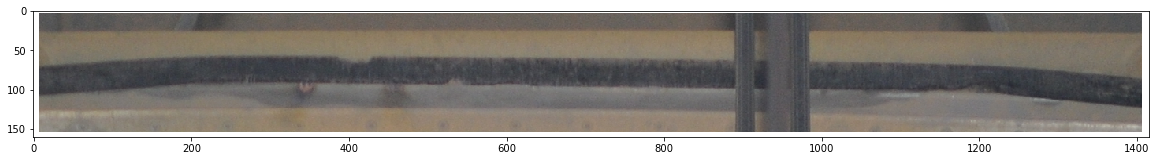

In [24]:
plt.figure(figsize=(20,10))
plt.imshow(image[:,:,[2,1,0]])
plt.show()

In [26]:
prediction = model.predict(image.reshape([1,image.shape[0],image.shape[1],image.shape[2]]))

In [30]:
prediction.shape

(1, 160, 1416, 1)

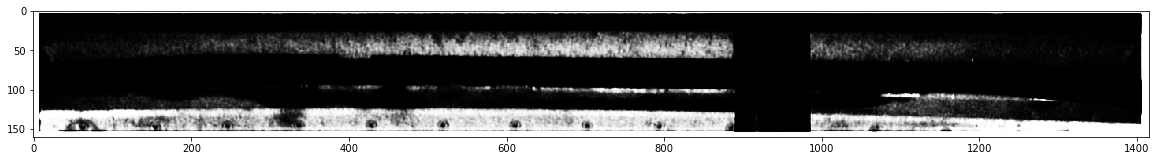

In [35]:
plt.figure(figsize = (20,10))
plt.imshow(prediction.reshape([image.shape[0],image.shape[1]]),cmap='gray')
plt.show()